## **Facial Recognition App using SIAMESE Network**


### Importing Dependencies

In [1]:
# Importing standard dependencies
import cv2
import os
import random
import numpy as np
from matplotlib import pyplot as plt

### Creating Folder Structures

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import os

BASE_PATH = '/content/drive/My Drive/ML_PROJECT'

POS_PATH = os.path.join(BASE_PATH, 'data', 'positive')
NEG_PATH = os.path.join(BASE_PATH, 'data', 'negative')
ANC_PATH = os.path.join(BASE_PATH, 'data', 'anchor')

# Creating the directories
os.makedirs(POS_PATH, exist_ok=True)
os.makedirs(NEG_PATH, exist_ok=True)
os.makedirs(ANC_PATH, exist_ok=True)

# Verifying if the directories were created
print(os.listdir(os.path.join(BASE_PATH, 'data')))


['positive', 'negative', 'anchor']


### Creating a folder for LFW(Labelled Faces in the Wild Dataset) dataset

In [5]:
BASE_PATH = '/content/drive/My Drive/ML_PROJECT'

# Creating a directory to store the extracted dataset
LFW_PATH = os.path.join(BASE_PATH, 'lfw')
os.makedirs(LFW_PATH, exist_ok=True)


### Untar Labelled Faces in the Wild Dataset

In [6]:
# Step 1: Download the LFW dataset
!wget -O "{BASE_PATH}/lfw.tgz" http://vis-www.cs.umass.edu/lfw/lfw.tgz

# Step 2: Extract the dataset
# This is same as uncompressing Tar GZ labelled Faces in the Wild Dataset
!tar -xzvf "{BASE_PATH}/lfw.tgz" -C "{LFW_PATH}"

# Verifying extraction
print(os.listdir(LFW_PATH))

### Moving the files from 'lfw' folder to 'negative' folder

In [7]:
# Move LFW Images to the following repository data/negative
# Inside the 'lfw' folder there is another 'lfw' folder.Inside that the remaining folders are present
for directory in os.listdir(LFW_PATH):
  for folder in os.listdir(os.path.join(LFW_PATH,directory)):
    for file in os.listdir(os.path.join(LFW_PATH,directory,folder)):
      EX_PATH = os.path.join(LFW_PATH, directory,folder, file)
      NEW_PATH = os.path.join(NEG_PATH, file)
      os.replace(EX_PATH, NEW_PATH)
# The above code basically does :
LFW_PATH/lfw/folder/file --> NEW_PATH

### Collecting Positives and Anchors

In [8]:
# This part was done using VSCode since webcam is not accessible through colab
import uuid

main_path = 'C:\\Users\\SHAIK REHNA AFROZ\\Downloads\\img_cap'
anchor_path = 'C:\\Users\\SHAIK REHNA AFROZ\\Downloads\\img_cap\\anchor'
positive_path = 'C:\\Users\\SHAIK REHNA AFROZ\\Downloads\\img_cap\\positive'

# Establishing a connection to the webcam
cap = cv2.VideoCapture(0)
while cap.isOpened():
  ret, frame = cap.read()

  # Cut down the frame to 250x250px
  frame = frame[200:500,200:500,:]

  # Collect anchors
  if cv2.waitKey(1) & 0xFF == ord('a'):
    # Create the unique file path
    imgname =os.path.join(anchor_path,'{}.jpg'.format(uuid.uuid1()))
    # write out anchor image
    cv2.imwrite(imgname, frame)

  # Collect positives
  if cv2.waitKey(1) & 0xFF == ord('p'):
    # Create the unique file path
    imgname =os.path.join(positive_path,'{}.jpg'.format(uuid.uuid1()))
    # write out anchor image
    cv2.imwrite(imgname, frame)

  # Show image back to screen
  cv2.imshow('Image collection', frame)

  # Breaking gracefully
  if cv2.waitKey(1) & 0xFF == ord('q'):
    break

# Release the Webcam
cap.release()
# Close the image show frame
cv2.destroyAllWindows()

### LOADING AND PREPROCESSING IMAGES

### Get Image Directories

In [9]:
anchor   = tf.data.Dataset.list_files(ANC_PATH + '/*.jpg').take(300)
# grab paths of 300 images  with 'jpg' extension from ANC_PATH
positive = tf.data.Dataset.list_files(POS_PATH + '/*.jpg').take(300)
negative = tf.data.Dataset.list_files(NEG_PATH + '/*.jpg').take(300)

In [10]:
ANC_PATH +'/*.jpg'

'/content/drive/My Drive/ML_PROJECT/data/anchor/*.jpg'

In [59]:
dir_test = anchor.as_numpy_iterator()
dir_test.next()

b'/content/drive/My Drive/ML_PROJECT/data/anchor/186f5fc8-4cce-11ef-97e0-04bf1b17c1d3.jpg'

### Preprocessing - Scale and Resize
### (Converting the values from 0-255 to 0-1)

In [60]:
def preprocess(file_path):
  # Read in image from file_path
  byte_img = tf.io.read_file(file_path)
  # Load in the image
  img = tf.io.decode_jpeg(byte_img)
  # Preprocessing steps - resizing the image to be 100x100x3
  img = tf.image.resize(img,(100,100))
  # scale image to be between 0 and 1
  img = img/255.0
  # Return the image
  return img

In [63]:
preprocess('/content/drive/My Drive/ML_PROJECT/data/anchor/175d0304-4cce-11ef-9e2f-04bf1b17c1d3.jpg')

<tf.Tensor: shape=(100, 100, 3), dtype=float32, numpy=
array([[[1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        ...,
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ]],

       [[1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        ...,
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ]],

       [[1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        ...,
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ]],

       ...,

       [[0.7117647 , 0.6       , 0.5058824 ],
        [0.71

In [66]:
img = preprocess('/content/drive/My Drive/ML_PROJECT/data/anchor/1d31cd84-4cce-11ef-9829-04bf1b17c1d3.jpg')

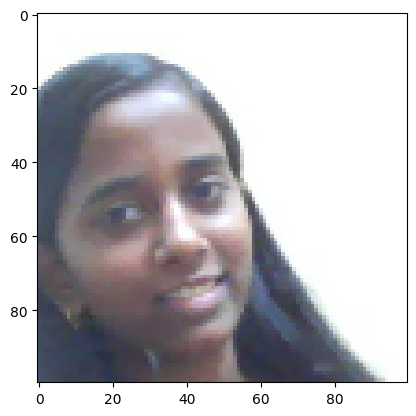

In [67]:
plt.imshow(img)

In [68]:
img.numpy().min()

0.16470589

### Creating Labelled Dataset

In [69]:
tf.ones_like([1,1,1,3.456,7342.921])
# returns an numpy array of 1

<tf.Tensor: shape=(5,), dtype=float32, numpy=array([1., 1., 1., 1., 1.], dtype=float32)>

In [70]:
# (anchor,positive) => 1,1,1,1 [For (anchor,positive) we get 1]
# (anchor,negative) => 0,0,0,0 [For (anchor,negative) we get 0]


In [71]:
class_labels = tf.data.Dataset.from_tensor_slices(tf.zeros(len(anchor)))

In [72]:
iterator_labs = class_labels.as_numpy_iterator()

In [73]:
iterator_labs.next()

0.0

In [74]:
tf.ones(len(anchor))

<tf.Tensor: shape=(300,), dtype=float32, numpy=
array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1

In [75]:
positives = tf.data.Dataset.zip((anchor,positive,tf.data.Dataset.from_tensor_slices(tf.ones(len(anchor)))))
# when anchor and positive are passed simultaneously then o/p is 1
negatives = tf.data.Dataset.zip((anchor,negative,tf.data.Dataset.from_tensor_slices(tf.zeros(len(anchor)))))
# when anchor and negative are passed simultaneously then o/p is 0
data = positives.concatenate(negatives)


In [76]:
samples = data.as_numpy_iterator()

In [84]:
example = samples.next()

In [85]:
example

(b'/content/drive/My Drive/ML_PROJECT/data/anchor/19a04714-4cce-11ef-8838-04bf1b17c1d3.jpg',
 b'/content/drive/My Drive/ML_PROJECT/data/positive/dc897698-4cce-11ef-aef7-04bf1b17c1d3.jpg',
 1.0)

## Build Train and Test Partition

In [86]:
# preprocessing entire directories
def preprocess_twin(input_img, validation_img, label):
  return(preprocess(input_img),preprocess(validation_img),label)

In [87]:
res = preprocess_twin(*example)

In [88]:
len(res)

3

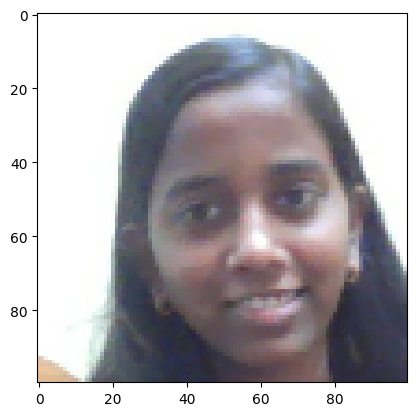

In [89]:
plt.imshow(res[0])

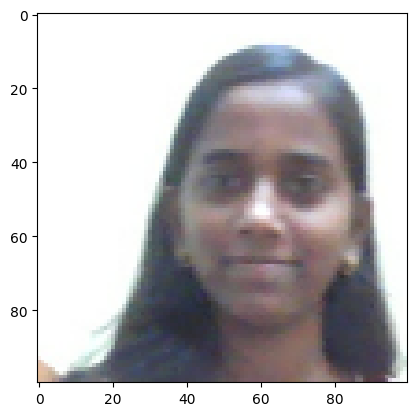

In [90]:
plt.imshow(res[1])

In [91]:
res[2]

1.0

In [92]:
# Building dataloader pipeline
data = data.map(preprocess_twin)
data = data.cache()
data = data.shuffle(buffer_size =1024)

In [93]:
data

<_ShuffleDataset element_spec=(TensorSpec(shape=(100, 100, None), dtype=tf.float32, name=None), TensorSpec(shape=(100, 100, None), dtype=tf.float32, name=None), TensorSpec(shape=(), dtype=tf.float32, name=None))>

In [94]:
samples = data.as_numpy_iterator()

In [95]:
r = samples.next()

In [96]:
len(r)

3

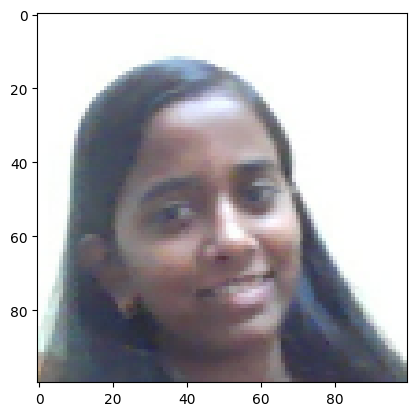

In [97]:
plt.imshow(r[0])

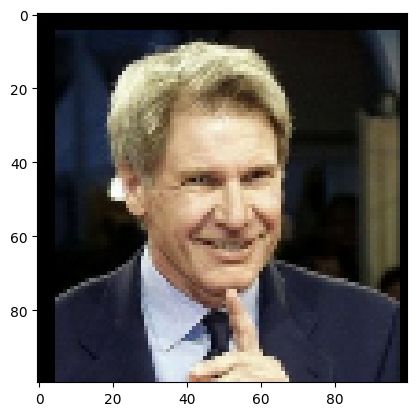

In [98]:
plt.imshow(r[1])

In [99]:
r[2]

0.0

In [100]:
data
# data is in the form of tuple(anchor,positive,label) or (anchor,negative,label)

<_ShuffleDataset element_spec=(TensorSpec(shape=(100, 100, None), dtype=tf.float32, name=None), TensorSpec(shape=(100, 100, None), dtype=tf.float32, name=None), TensorSpec(shape=(), dtype=tf.float32, name=None))>

In [101]:
# Training partition
train_data = data.take(round(len(data)*.7)) # Take 420 elements out of 600 from 'data' dataset
# This takes the first 70% of the dataset and assigns it to train_data
train_data = train_data.batch(16)    # batch size of 16
train_data = train_data.prefetch(8)  # Prefetch to improve performance

In [102]:
round(len(data)*.7)
# o/p is 420 becoz there are 600 labelled images(tuples). 600 *0.7 = 420
# 300 : (anchor,positive,label) Labelled as 1
# 300 : (anchor,negative,label ) Labelled as 0

420

In [103]:
train_data

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 100, 100, None), dtype=tf.float32, name=None), TensorSpec(shape=(None, 100, 100, None), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.float32, name=None))>

In [104]:
len(train_data)

27

In [105]:
# Dataset: Contains 27 batches.(Batch size = 16(except last batch))
  # Batch: Each batch is a tuple with:
      # Anchor images: Shape (16, height, width, channels).
      # Positive/Negative images: Shape (16, height, width, channels).
      # Labels: Shape (16,).

In [106]:
train_samples = train_data.as_numpy_iterator()
# The iterator train_samples itself does not contain data directly.
# Instead, it allows us to retrieve batches of data sequentially.
# Each batch is a tuple with three components

In [107]:
train_sample = train_samples.next()
# train_sample is a tuple with three elements:
# train_sample[0]: NumPy array of shape (16, height, width, channels) for anchor images.
# train_sample[1]: NumPy array of shape (16, height, width, channels) for positive or negative images.
# train_sample[2]: NumPy array of shape (16,) for labels.

In [108]:
len(train_sample[0])

16

In [109]:
# Testing partition
# will skip the first 420 elements and take the next 180 elements
# This skips the first 70% of the dataset, effectively giving us the remaining 30%
test_data = data.skip(round(len(data)*.7))
test_data = test_data.take(round(len(data)*.3))
# # This takes the next 30% of the dataset from the remaining elements
test_data = test_data.batch(16)
test_data = test_data.prefetch(8)

In [110]:
len(data)*.3

180.0

In [111]:
test_samples = test_data.as_numpy_iterator()
test_sample = test_samples.next()

In [112]:
len(test_data)
# 16 * 12 = 192(can accomoate 180 elements)
# 16 * 11 = 172(<180)
# 12 batches with 16 elements in each batch

12

In [113]:
len(test_sample[0])
# test_sample is a tuple with first element as size 16

16

## Building an Embedding Layer

In [114]:
inp = Input(shape =(100,100,3),name ='input_image')

In [115]:
c1 = Conv2D(64,(10,10), activation ='relu')(inp)

In [116]:
# Embedding layer according to SIAMESE Network
def make_embedding():
  inp = Input(shape=(100,100,3),name='input_image')

  # First Block
  c1 = Conv2D(6,(10,10),activation='relu')(inp)
  m1 = MaxPooling2D(64,(2,2),padding='same')(c1)

  # Second Block
  c2 = Conv2D(128,(7,7),activation='relu')(m1)
  m2 = MaxPooling2D(64,(2,2),padding='same')(c2)

  # Third Block
  c3 = Conv2D(128,(4,4),activation='relu')(m2)
  m3 = MaxPooling2D(64,(2,2),padding='same')(c3)

  # Final embedding block
  c4 = Conv2D(256,(4,4),activation ='relu')(m3)
  f1 = Flatten()(c4)
  d1 = Dense(4096,activation='sigmoid')(f1)

  return Model(inputs=[inp] ,outputs=[d1],name='embedding')


In [117]:
embedding = make_embedding()

In [118]:
embedding.summary()

Model: "embedding"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_image (InputLayer)    [(None, 100, 100, 3)]     0         
                                                                 
 conv2d_1 (Conv2D)           (None, 91, 91, 6)         1806      
                                                                 
 max_pooling2d (MaxPooling2  (None, 46, 46, 6)         0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 40, 40, 128)       37760     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 20, 20, 128)       0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 17, 17, 128)       26

## Building a Distance Layer

In [119]:
# Siamese L1 Distance class
class L1Dist(Layer):

  # Init method - inheritance
  def __init__(self,**kwargs):
    super().__init__()
# Usage: super().__init__(**kwargs) calls the __init__ method of the
# superclass, passing along any keyword arguments it received.
# This ensures that the superclass is properly initialized with those arguments

  # Magic happens here - Similarity calculation
  def call(self,input_embedding,validation_embedding):
      return tf.math.abs(input_embedding-validation_embedding)

In [120]:
l1 = L1Dist()

In [ ]:
l1(anchor_embedding,validation_embedding)

## Siamese Model

In [122]:
input_image = Input(name='input_img',shape=(100,100,3))
validation_image = Input(name='validation_img',shape=(100,100,3))

In [123]:
inp_embedding = embedding(input_image)
val_embedding = embedding(validation_image)

In [124]:
inp_embedding

<KerasTensor: shape=(None, 4096) dtype=float32 (created by layer 'embedding')>

In [125]:
val_embedding

<KerasTensor: shape=(None, 4096) dtype=float32 (created by layer 'embedding')>

In [126]:
siamese_layer = L1Dist()

In [127]:
distances = siamese_layer(inp_embedding,val_embedding)
# This represents the distances between input_embedding and validation_embedding

In [128]:
distances

<KerasTensor: shape=(None, 4096) dtype=float32 (created by layer 'l1_dist_1')>

In [129]:
classifier = Dense(1,activation='sigmoid')(distances)

In [130]:
classifier
# we get our final o/p with shape 1x1

<KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_1')>

In [131]:
siamese_network = Model(inputs = [input_image,validation_image], outputs=classifier, name='SiameseNetwork')

In [132]:
siamese_network.summary()

Model: "SiameseNetwork"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_img (InputLayer)      [(None, 100, 100, 3)]        0         []                            
                                                                                                  
 validation_img (InputLayer  [(None, 100, 100, 3)]        0         []                            
 )                                                                                                
                                                                                                  
 embedding (Functional)      (None, 4096)                 3857921   ['input_img[0][0]',           
                                                          4          'validation_img[0][0]']      
                                                                                     

In [133]:
def make_siamese_model():

  # Anchor image input in the network
  input_image = Input(name='input_img',shape=(100,100,3))
  # Validation image in the network
  validation_image = Input(name='validation_img',shape=(100,100,3))

   # Combine siamese distance components
  siamese_layer = L1Dist()
  siamese_layer._name = 'distance'
  distances = siamese_layer(embedding(input_image),embedding(validation_image))

   # Classification Layer
  classifier = Dense(1,activation='sigmoid')(distances)

  return Model(inputs = [input_image,validation_image], outputs=classifier, name='SiameseNetwork')

In [134]:
siamese_model = make_siamese_model()

In [135]:
siamese_model.summary()

Model: "SiameseNetwork"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_img (InputLayer)      [(None, 100, 100, 3)]        0         []                            
                                                                                                  
 validation_img (InputLayer  [(None, 100, 100, 3)]        0         []                            
 )                                                                                                
                                                                                                  
 embedding (Functional)      (None, 4096)                 3857921   ['input_img[0][0]',           
                                                          4          'validation_img[0][0]']      
                                                                                     

## TRAINING

### Setup Loss and Optimizer

In [136]:
binary_cross_loss = tf.losses.BinaryCrossentropy()

In [137]:
opt = tf.keras.optimizers.Adam(1e-4) # 0.0001

### Establishing Checkpoints

In [138]:
checkpoint_dir = '/content/drive/MyDrive/ML_PROJECT/training_checkpoints'
checkpoint_prefix = os.path.join(checkpoint_dir,'ckpt')
checkpoint = tf.train.Checkpoint(opt=opt ,siamese_model = siamese_model)

### Build Train Step Function

In [139]:
test_batch = train_data.as_numpy_iterator()

In [140]:
batch_1 =test_batch.next()

In [141]:
len(batch_1[0])

16

In [142]:
len(batch_1[1])

16

In [143]:
batch_1[2]

array([1., 1., 0., 1., 0., 1., 1., 0., 1., 1., 0., 0., 1., 1., 1., 0.],
      dtype=float32)

In [144]:
X = batch_1[:2]
np.array(X).shape
# 2 : anchor + (positive or negative image)
# 16 : each anchor and (+ve or -ve) part have 16 samples each
# (100,100,3) : image shape

(2, 16, 100, 100, 3)

In [145]:
@tf.function
def train_step(batch):

  # Record all of our operations
  with tf.GradientTape() as tape:
    # Get anchor and positive/negative image
    X = batch[:2]
    # Get Label
    y = batch[2]

    # Forward pass
    yhat = siamese_model(X, training=True)
    # Calculate loss
    loss = binary_cross_loss(y, yhat) # (y_true,y_predicted)
  print(loss)

  # Calculate gradients
  grad = tape.gradient(loss,siamese_model.trainable_variables)

  # Calculate updated weights and apply to siamese model
  opt.apply_gradients(zip(grad,siamese_model.trainable_variables))
  return loss

### Build Training Loop

In [146]:
def train(data,EPOCHS):
  # loop through epochs
  for epoch in range(1,EPOCHS+1):
    print('\n Epoch {}/{}'.format(epoch,EPOCHS))
    progbar = tf.keras.utils.Progbar(len(data))


    # Initialize the total loss
    total_loss = 0.0

    # loop through each batch
    for idx, batch in enumerate(data):
        # Run train step here
      loss = train_step(batch)
      total_loss += loss

     # Update the progress bar
      progbar.update(idx+1)

    # Calculate the average loss
    avg_loss = total_loss / len(data)

    print("Loss :{:.4f}".format(avg_loss))

    # Save checkpoints
    if epoch % 10 == 0:
      checkpoint.save(file_prefix=checkpoint_prefix)

### Train the model

In [147]:
EPOCHS = 50

In [148]:
train(train_data, EPOCHS)


 Epoch 1/50
Tensor("binary_crossentropy/weighted_loss/value:0", shape=(), dtype=float32)
Tensor("binary_crossentropy/weighted_loss/value:0", shape=(), dtype=float32)
27/27 [==============================] - 11s 106ms/step
Loss :0.4748

 Epoch 2/50
27/27 [==============================] - 2s 81ms/step
Loss :0.2595

 Epoch 3/50
27/27 [==============================] - 2s 81ms/step
Loss :0.1363

 Epoch 4/50
27/27 [==============================] - 2s 80ms/step
Loss :0.0775

 Epoch 5/50
27/27 [==============================] - 2s 91ms/step
Loss :0.0732

 Epoch 6/50
27/27 [==============================] - 3s 96ms/step
Loss :0.1175

 Epoch 7/50
27/27 [==============================] - 3s 96ms/step
Loss :0.0996

 Epoch 8/50
27/27 [==============================] - 2s 84ms/step
Loss :0.0560

 Epoch 9/50
27/27 [==============================] - 2s 81ms/step
Loss :0.0326

 Epoch 10/50
27/27 [==============================] - 2s 81ms/step
Loss :0.0378

 Epoch 11/50
27/27 [======================

### EVALUATE MODEL

In [149]:
# Import metric calculations
from tensorflow.keras.metrics import Precision, Recall

In [150]:
# Get a batch of test data
test_input, test_val, y_true =test_data.as_numpy_iterator().next()

In [151]:
# Make predictions
y_hat = siamese_model.predict([test_input, test_val])
y_hat

1/1 [==============================] - 0s 223ms/step


array([[9.9990988e-01],
       [9.9999917e-01],
       [6.5348634e-15],
       [1.0000000e+00],
       [3.7239992e-19],
       [1.3512420e-10],
       [9.9999499e-01],
       [1.0000000e+00],
       [1.0250615e-17],
       [9.2108452e-01],
       [3.6039278e-15],
       [1.0000000e+00],
       [1.9211942e-14],
       [9.9812788e-01],
       [9.9715400e-01],
       [2.1166184e-17]], dtype=float32)

In [177]:
# post processing the results
[1 if prediction > 0.5 else 0 for prediction in y_hat]

[1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0]

In [178]:
y_true

array([1., 1., 0., 1., 0., 0., 1., 1., 0., 1., 0., 1., 0., 1., 1., 0.],
      dtype=float32)

In [179]:
# Creating a metric object
m = Recall()
# Calculating the recall value
m.update_state(y_true,y_hat)
# Return recall
m.result().numpy()

1.0

In [180]:
# Creating a metric object
m = Precision()
# Calculating the recall value
m.update_state(y_true,y_hat)
# Return recall
m.result().numpy()

1.0

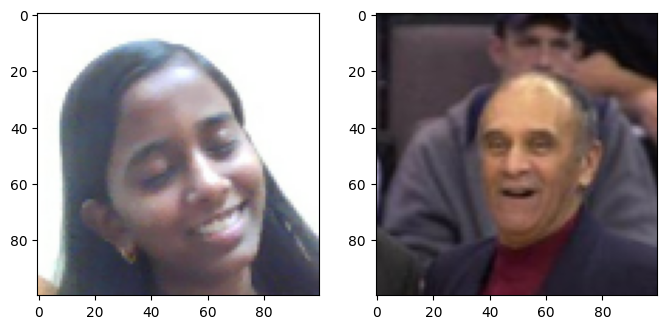

In [197]:
# Set plot size
plt.figure(figsize =(8,8))
# Set first subplot
plt.subplot(1,2,1)
plt.imshow(test_input[0])
# set second subplot
plt.subplot(1,2,2)
plt.imshow(test_val[15])
# Renders the o/p cleanly
plt.show()
# output from prediction: [1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0]

In [ ]:
# link of the video checking the above output from prediction: [1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0]
https://drive.google.com/file/d/1EwfxRTBCLD2GIs6njxS1idy6uCZf2KEw/view?usp=sharing

### Save Model

In [157]:
# Save weights
save_dir = '/content/drive/MyDrive/ML_PROJECT'

os.makedirs(save_dir, exist_ok=True)

model_path = os.path.join(save_dir, 'siamesemodel.h5')

siamese_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

siamese_model.save(model_path)

print(f"Model saved at: {model_path}")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Model saved at: /content/drive/MyDrive/ML_PROJECT/siamesemodel.h5


In [160]:
# Reload model
model = tf.keras.models.load_model(model_path,
                                   custom_objects={'L1Dist':L1Dist, 'BinaryCrossentropy':tf.losses.BinaryCrossentropy})

In [161]:
# Make predictions with reloaded model
model.predict([test_input,test_val])

1/1 [==============================] - 0s 109ms/step


array([[9.9990988e-01],
       [9.9999917e-01],
       [6.5348634e-15],
       [1.0000000e+00],
       [3.7239992e-19],
       [1.3512420e-10],
       [9.9999499e-01],
       [1.0000000e+00],
       [1.0250615e-17],
       [9.2108452e-01],
       [3.6039278e-15],
       [1.0000000e+00],
       [1.9211942e-14],
       [9.9812788e-01],
       [9.9715400e-01],
       [2.1166184e-17]], dtype=float32)

In [162]:
model.summary()

Model: "SiameseNetwork"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_img (InputLayer)      [(None, 100, 100, 3)]        0         []                            
                                                                                                  
 validation_img (InputLayer  [(None, 100, 100, 3)]        0         []                            
 )                                                                                                
                                                                                                  
 embedding (Functional)      (None, 4096)                 3857921   ['input_img[0][0]',           
                                                          4          'validation_img[0][0]']      
                                                                                     